#  <span style="font-family: cursive">Notebook Imports</span>


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
death_df = pd.read_csv('death.csv')
incd_df = pd.read_csv('incd.csv')

In [3]:
death_df.head()

,index,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [4]:
incd_df.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3
3,3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
4,4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9


In [5]:
# Merging the datasets on FIPS
df = pd.merge(death_df, incd_df, on='index')
df = df.rename(columns={
    'FIPS' : 'FIPS_x',
    ' FIPS' : 'FIPS_y',
    'Met Objective of 45.5? (1)' :'Objective',
    'Age-Adjusted Death Rate' : 'Adjusted_Age',
    'Lower 95% Confidence Interval for Death Rate' : 'Lower95%_DeathRate',
    'Upper 95% Confidence Interval for Death Rate' : 'Upper95%_DeathRate',
    'Average Deaths per Year' : 'Death_Rate',
    'Recent Trend (2)' : 'Recent_Trend_x',
    'Recent 5-Year Trend (2) in Death Rates' : 'Recent5YearTrend_x',
    'Lower 95% Confidence Interval for Trend' : 'Lower95%CI_Trend',
    'Upper 95% Confidence Interval for Trend' : 'Upper95%CI_Trend',
    'Age-Adjusted Incidence Rate(Ê) - cases per 100,000' : 'Adjusted_Age_Incd',
    'Lower 95% Confidence Interval'  : 'Lower95%CI_Incd',
    'Upper 95% Confidence Interval'  : 'Upper95%CI_Incd',
    'Average Annual Count' : 'Average_Annual_Count',
    'Recent Trend' : 'RecentTrend_y',
    'Recent 5-Year Trend (ˆ) in Incidence Rates' : 'Recent5YearTrend_y',
    'Lower 95% Confidence Interval.1' : 'Lower95%CI_Incd.1',
    'Upper 95% Confidence Interval.1' : 'Upper95%CI_Incd.1'
})

df.set_index('index', inplace=True)

In [6]:
df.head()

,County_x,FIPS_x,Objective,Adjusted_Age,Lower95%_DeathRate,Upper95%_DeathRate,Death_Rate,Recent_Trend_x,Recent5YearTrend_x,Lower95%CI_Trend,Upper95%CI_Trend,County_y,FIPS_y,Adjusted_Age_Incd,Lower95%CI_Incd,Upper95%CI_Incd,Average_Annual_Count,RecentTrend_y,Recent5YearTrend_y,Lower95%CI_Incd.1,Upper95%CI_Incd.1
index,,,,,,,,,,,,,,,,,,,,,
0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9


# <span style="font-family : cursive">Features Description</span>

* **County_x, County_y** --> Name of geographical region.
* **FIPS_x, FIPS**       --> Federal Information Processing Standards, standralized set of codes uniquely identify counties.
* **Objective**         --> Whether the county met the objective of a death rate of 45.5.
* **Adjusted_Age**       --> Age-adjusted death rate for cancer in the county.
* **Lower95%_DeathRate** --> Lower Boundary esitmate of death rate within a 95% confidence interval.
* **Upper95%_DeathRate** --> Upper Boundary estimate of death rate within a 95% confidence interval.
* **Death_Rate**         --> Average Number of Deaths caused by cancer.
* **Recent_Trend_x**     --> Increase, Decrease, or Stable of the cancer death rate.
* **Recent5YearTrend_x** --> Trend in Death rates over last five years.
* **Lower95%CI_Trend**   --> Lower boundary estimate of the Trend in death rates within 95% CI.
* **Upper95%CI_Trend**   --> Upper boundary estimate of the Trend in death rates within 95% CI.
* **Ajusted_Age_Incd**   --> The rate of new cases of cancer reported per 100,000, adjusted to account for age difference between populations.
* **Average_Annual_Count**--> New cancer cases reported annually in the county.

# <span style="font-family : cursive">Data Exploration</span>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3141 entries, 0 to 3140
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   County_x              3141 non-null   object
 1   FIPS_x                3141 non-null   int64 
 2   Objective             3141 non-null   object
 3   Adjusted_Age          3141 non-null   object
 4   Lower95%_DeathRate    3141 non-null   object
 5   Upper95%_DeathRate    3141 non-null   object
 6   Death_Rate            3141 non-null   object
 7   Recent_Trend_x        3141 non-null   object
 8   Recent5YearTrend_x    3141 non-null   object
 9   Lower95%CI_Trend      3141 non-null   object
 10  Upper95%CI_Trend      3141 non-null   object
 11  County_y              3141 non-null   object
 12  FIPS_y                3141 non-null   int64 
 13  Adjusted_Age_Incd     3141 non-null   object
 14  Lower95%CI_Incd       3141 non-null   object
 15  Upper95%CI_Incd       3141 non-null   objec

In [8]:
df.shape

(3141, 21)

In [9]:
df.describe(include='O').T

,count,unique,top,freq
County_x,3141,3141,United States,1
Objective,3141,3,No,1985
Adjusted_Age,3141,618,*,328
Lower95%_DeathRate,3141,572,*,328
Upper95%_DeathRate,3141,767,*,328
Death_Rate,3141,307,*,328
Recent_Trend_x,3141,5,stable,1796
Recent5YearTrend_x,3141,149,**,420
Lower95%CI_Trend,3141,155,**,420
Upper95%CI_Trend,3141,129,**,420


In [10]:
df.isnull().sum()

County_x                0
FIPS_x                  0
Objective               0
Adjusted_Age            0
Lower95%_DeathRate      0
Upper95%_DeathRate      0
Death_Rate              0
Recent_Trend_x          0
Recent5YearTrend_x      0
Lower95%CI_Trend        0
Upper95%CI_Trend        0
County_y                0
FIPS_y                  0
Adjusted_Age_Incd       0
Lower95%CI_Incd         0
Upper95%CI_Incd         0
Average_Annual_Count    0
RecentTrend_y           0
Recent5YearTrend_y      0
Lower95%CI_Incd.1       0
Upper95%CI_Incd.1       0
dtype: int64

In [11]:
# convert into integer dtype
# numerical_feat = [
#     'Adjusted_Age', 'Lower95%_DeathRate',
#     'Upper95%_DeathRate', 'Death_Rate',
#     'Recent5YearTrend_x', 'Lower95%CI_Trend',
#     'Upper95%CI_Trend', 'Adjusted_Age_Incd',
#     'Lower95%CI_Incd', 'Upper95%CI_Incd',
#     'Average_Annual_Count', 'Recent5YearTrend_y',
#     'Lower95%CI_Incd.1', 'Upper95%CI_Incd.1'
# ]
# for i in numerical_feat:
#     data[i] = data[i].astype('int64')

In [12]:
df.columns

Index(['County_x', 'FIPS_x', 'Objective', 'Adjusted_Age', 'Lower95%_DeathRate',
       'Upper95%_DeathRate', 'Death_Rate', 'Recent_Trend_x',
       'Recent5YearTrend_x', 'Lower95%CI_Trend', 'Upper95%CI_Trend',
       'County_y', 'FIPS_y', 'Adjusted_Age_Incd', 'Lower95%CI_Incd',
       'Upper95%CI_Incd', 'Average_Annual_Count', 'RecentTrend_y',
       'Recent5YearTrend_y', 'Lower95%CI_Incd.1', 'Upper95%CI_Incd.1'],
      dtype='object')

# <span style="font-family : cursive">Exploratory Data Analysis(EDA) </span>

After having carefully gone over the datasets' provided details:
1. *, ** symbols represent missing data due to sparsity or privacy concerns.
     * It's essential to handle these symbols appropriately during data processing.
2. Classification of Trends
    * Rising --> When the 95% CI of average annual percent is above 0
    * Stable --> When the 95% CI  of average annual percent is includes 0
    * Falling --> When the 95% CI of average annual percent is below 036. Age GroupsModifiation:
    * The age groups are categorized as (<1, 1-4, 5-9, ..., 80-84, 85+).
4. The dataset lacks information for the US state of Nevada.)

In [13]:
# Identifying columns that contains that symbols *, **
col_with_symbols = []

for col in df.columns:
    if df[col].astype(str).str.count('\*|\*\*').sum() > 0:
      col_with_symbols.append(col)
print('Columns that contains * and ** representing suppressed or sparse data:\n', col_with_symbols)

Columns that contains * and ** representing suppressed or sparse data:
 ['Objective', 'Adjusted_Age', 'Lower95%_DeathRate', 'Upper95%_DeathRate', 'Death_Rate', 'Recent_Trend_x', 'Recent5YearTrend_x', 'Lower95%CI_Trend', 'Upper95%CI_Trend', 'Adjusted_Age_Incd', 'Lower95%CI_Incd', 'Upper95%CI_Incd', 'RecentTrend_y', 'Recent5YearTrend_y', 'Lower95%CI_Incd.1', 'Upper95%CI_Incd.1']


In [14]:
# for now replace them with NaN
df[col_with_symbols] = df[col_with_symbols].replace(['*', '**'], np.nan)
df.tail(3)

,County_x,FIPS_x,Objective,Adjusted_Age,Lower95%_DeathRate,Upper95%_DeathRate,Death_Rate,Recent_Trend_x,Recent5YearTrend_x,Lower95%CI_Trend,Upper95%CI_Trend,County_y,FIPS_y,Adjusted_Age_Incd,Lower95%CI_Incd,Upper95%CI_Incd,Average_Annual_Count,RecentTrend_y,Recent5YearTrend_y,Lower95%CI_Incd.1,Upper95%CI_Incd.1
index,,,,,,,,,,,,,,,,,,,,,
3138,"Zapata County, Texas",48505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Uinta County, Wyoming(6,10)",56041,31.7,20.8,46.1,6,stable,-0.1,-18.3,22
3139,"Zavala County, Texas",48507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Washakie County, Wyoming(6,10)",56043,50,33.8,72.2,6,stable,13.5,-12.2,46.7
3140,"Ziebach County, South Dakota",46137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Weston County, Wyoming(6,10)",56045,44.9,27.9,69.6,4,stable,-26.2,-65.4,57.4


In [15]:
# convert the dtypes to integer
numerical_col = [
    'Adjusted_Age', 'Lower95%_DeathRate',
    'Upper95%_DeathRate', 'Death_Rate',
    'Recent5YearTrend_x', 'Lower95%CI_Trend',
    'Upper95%CI_Trend', 'Adjusted_Age_Incd',
    'Lower95%CI_Incd', 'Upper95%CI_Incd',
    'Average_Annual_Count','Recent5YearTrend_y',
    'Lower95%CI_Incd.1', 'Upper95%CI_Incd.1'
]

for column in numerical_col:
   df[column] = df[column].apply(lambda x : pd.to_numeric(x, errors='coerce'))
    

### *Handling Missing Values* 

In [16]:
df.isnull().sum()

County_x                  0
FIPS_x                    0
Objective               328
Adjusted_Age            328
Lower95%_DeathRate      328
Upper95%_DeathRate      328
Death_Rate              335
Recent_Trend_x          447
Recent5YearTrend_x      447
Lower95%CI_Trend        447
Upper95%CI_Trend        447
County_y                  0
FIPS_y                    0
Adjusted_Age_Incd       501
Lower95%CI_Incd         422
Upper95%CI_Incd         422
Average_Annual_Count    422
RecentTrend_y           260
Recent5YearTrend_y      469
Lower95%CI_Incd.1       469
Upper95%CI_Incd.1       469
dtype: int64

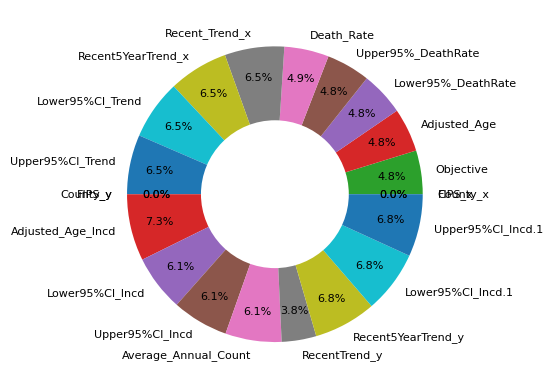

In [47]:
# percentage of missing values 
percentages = [(col, df[col].isnull().sum() / df.shape[0] * 100 ) for col in df.columns]
columns, missing_perc = zip(*percentages)
plt.pie(x=missing_perc, labels=columns, textprops={'fontsize':8}, 
        autopct='%1.1f%%', pctdistance=0.8)
center_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(center_circle)
plt.show()

In [17]:
# Objective | Adjusted Age | Lower95%_DeathRate | Upper95%_DeathRate
data = df[['Objective', 'Adjusted_Age', 'Lower95%_DeathRate', 'Upper95%_DeathRate']]
data[data.isnull().all(axis=1)].head()

,Objective,Adjusted_Age,Lower95%_DeathRate,Upper95%_DeathRate
index,,,,
2813,NaN,NaN,NaN,NaN
2814,NaN,NaN,NaN,NaN
2815,NaN,NaN,NaN,NaN
2816,NaN,NaN,NaN,NaN
2817,NaN,NaN,NaN,NaN


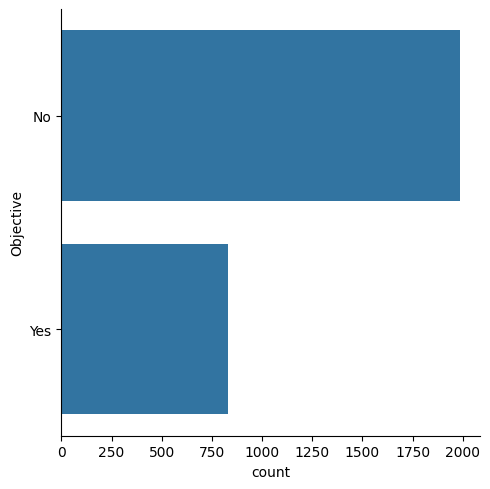

In [50]:
sns.catplot(df['Objective'], kind='count')

In [20]:
df['Objective'].value_counts()

Objective
No     1985
Yes     828
Name: count, dtype: int64